In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
X_train_full = X_train_full.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [4]:
X_train_n=X_train_full/255.0
X_test_n=X_test/255.0

In [5]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, padding="valid", activation="relu", input_shape=[28, 28, 1]))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │     1,622,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,654,130 (6.31 MB)

 Trainable params: 1,654,130 (6.31 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [11]:
model_history=model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_valid, y_valid))

Epoch 1/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.5961 - loss: 1.1937 - val_accuracy: 0.7406 - val_loss: 0.7224
Epoch 2/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 78s 45ms/step - accuracy: 0.7969 - loss: 0.5550 - val_accuracy: 0.7892 - val_loss: 0.6065
Epoch 3/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.8206 - loss: 0.4916 - val_accuracy: 0.8146 - val_loss: 0.5296
Epoch 4/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.8352 - loss: 0.4531 - val_accuracy: 0.8234 - val_loss: 0.4885
Epoch 5/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.8452 - loss: 0.4254 - val_accuracy: 0.8342 - val_loss: 0.4615
Epoch 6/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.8538 - loss: 0.4033 - val_accuracy: 0.8424 - val_loss: 0.4365
Epoch 7/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.8604 - loss: 0.3843 - val_accuracy: 0.8510 - val_loss: 0.4171
Epoch 8/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.8659 - loss: 0.3682 - 

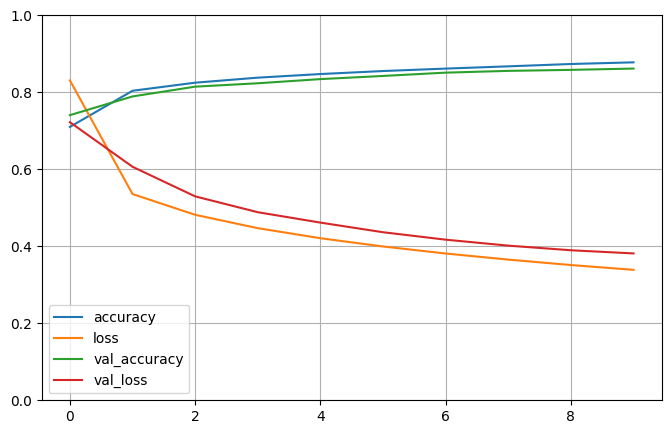

In [12]:
import matplotlib.pyplot as plt
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
ev=model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8457 - loss: 0.4145


In [14]:
ev

[0.42380252480506897, 0.8413000106811523]

In [15]:
X_new = X_test[:10]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.17, 0.01, 0.8 ],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.04, 0.  , 0.25, 0.  , 0.04, 0.  , 0.67, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, 0.  , 0.96, 0.  , 0.02, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, 0.  , 0.31, 0.  , 0.68, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, 0.  , 0.  , 0.9 , 0.  , 0.08, 0.01, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

In [17]:
y_pred=model.predict(X_new)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[2.2191185e-05, 1.0215560e-04, 6.2586456e-05, 6.0619757e-05,
        1.2598050e-04, 1.9754145e-02, 3.6457510e-05, 1.7181094e-01,
        5.6883814e-03, 8.0233651e-01],
       [1.1524074e-05, 2.4994415e-06, 9.7707015e-01, 3.0329750e-06,
        1.9357800e-02, 2.7664748e-09, 3.5536140e-03, 2.2051201e-10,
        1.2285054e-06, 3.6179768e-09],
       [1.4160674e-06, 9.9996811e-01, 6.3676259e-07, 6.1510523e-06,
        2.2743998e-05, 1.0156027e-08, 6.0177865e-07, 2.8496501e-07,
        3.0430378e-08, 1.6212795e-08],
       [4.8570774e-07, 9.9995226e-01, 4.2137049e-07, 3.6305293e-05,
        9.2431301e-06, 7.5235882e-08, 5.8764925e-07, 2.8551625e-07,
        1.7525688e-08, 1.6168279e-07],
       [3.8769506e-02, 1.8391121e-03, 2.4885903e-01, 2.0620546e-03,
        3.6945950e-02, 2.9187944e-05, 6.6998190e-01, 1.5091241e-05,
        1.3925447e-03, 1.0561937e-04],
       [1.2084339e-04, 9.9752158e-01, 7.6440621e-05, 1.9547927e-04,
        1.9168109e-03, 2.0387711e-07, 1.6122003e-04, 3.19

AxesImage(shape=(28, 28))


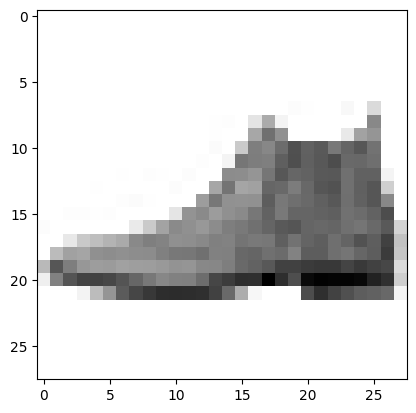

In [18]:
print(plt.imshow(X_new[0].reshape(28,28), cmap="binary"))